In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Check Dataset

In [4]:
#Input dataset
test = pd.read_csv("~/Desktop/test_results.csv")
test

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0
...,...,...,...,...,...,...,...,...
316795,17427,2015-04-11 09:29:15,ads_facebook,web,windows,0,39,0
316796,687787,2015-03-16 23:31:55,direct_traffic,web,windows,0,39,0
316797,618863,2015-04-11 01:35:19,ads-google,web,mac,0,39,0
316798,154636,2015-05-14 05:46:42,friend_referral,mobile,android,0,39,0


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 8 columns):
user_id             316800 non-null int64
timestamp           316800 non-null object
source              316800 non-null object
device              316800 non-null object
operative_system    316800 non-null object
test                316800 non-null int64
price               316800 non-null int64
converted           316800 non-null int64
dtypes: int64(4), object(4)
memory usage: 19.3+ MB


Check if user_id on test data are unique.

In [6]:
test['user_id'].nunique()

316800

In [7]:
#Input dataset
user = pd.read_csv("~/Desktop/user_table.csv")
user

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68
...,...,...,...,...,...
275611,485975,Atlanta,USA,33.76,-84.42
275612,35479,Los Angeles,USA,34.11,-118.41
275613,516519,Chicago,USA,41.84,-87.68
275614,984877,Tampa,USA,27.96,-82.48


In [8]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275616 entries, 0 to 275615
Data columns (total 5 columns):
user_id    275616 non-null int64
city       275616 non-null object
country    275616 non-null object
lat        275616 non-null float64
long       275616 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.5+ MB


Check if user_id on user data are unique.

In [9]:
user['user_id'].nunique()

275616

316800 - 275616 = 41184. There are 13% missing value 

# Data preparation

Compare with the total dataset, 13% missing value will only slightly effect final result, I decide ignore missing rows. 
I will merge these two datasets by using Inner Joint.

In [10]:
df = pd.merge(left = test, right = user, how = 'inner', on = 'user_id')
df

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02
...,...,...,...,...,...,...,...,...,...,...,...,...
275611,388438,2015-05-20 11:34:44,seo-google,web,windows,1,59,0,Joliet,USA,41.53,-88.12
275612,687787,2015-03-16 23:31:55,direct_traffic,web,windows,0,39,0,Bell Gardens,USA,33.97,-118.15
275613,618863,2015-04-11 01:35:19,ads-google,web,mac,0,39,0,West Seneca,USA,42.84,-78.75
275614,154636,2015-05-14 05:46:42,friend_referral,mobile,android,0,39,0,Walnut Creek,USA,37.90,-122.04


Check test result:

In [11]:
df[['price', 'test', 'user_id']].groupby(['test', 'price']).count()

user_id
test price         
0    39      176241
     59         187
1    39         135
     59       99053

Some issues with test dataset:

There are a small amount of users who are labelled with test=0 but actually price is 59 
There are a small amount of users who are labelled with test=1 but actually price is 39



Therefore, keep the valid data

In [12]:
df = df[((df['test']==0) & (df['price']==39)) | ((df['test']==1) & (df['price']==59))]

Create new column called Revenue

In [32]:
df['revenue'] = df['converted'] * df['price']
df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,revenue
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275611,388438,2015-05-20 11:34:44,seo-google,web,windows,1,59,0,Joliet,USA,41.53,-88.12,0
275612,687787,2015-03-16 23:31:55,direct_traffic,web,windows,0,39,0,Bell Gardens,USA,33.97,-118.15,0
275613,618863,2015-04-11 01:35:19,ads-google,web,mac,0,39,0,West Seneca,USA,42.84,-78.75,0
275614,154636,2015-05-14 05:46:42,friend_referral,mobile,android,0,39,0,Walnut Creek,USA,37.90,-122.04,0


In [15]:
df.isnull().sum()

user_id             0
timestamp           0
source              0
device              0
operative_system    0
test                0
price               0
converted           0
city                0
country             0
lat                 0
long                0
revenue             0
dtype: int64

# Using Chi-Square test check A/Btest randomization

Select variables to create a data set to test the composition of the experimental group and control group

In [16]:
data = df[['user_id','source','device','operative_system','test','city']]
data.set_index(['user_id'],inplace = True)

Change variables to numerical label

In [19]:
from sklearn.preprocessing import LabelEncoder
source_label_encoder = LabelEncoder()
device_label_encoder = LabelEncoder()
os_label_encoder = LabelEncoder()
city_label_encoder = LabelEncoder()

data['source'] = source_label_encoder.fit_transform(data.source)
data['device'] = device_label_encoder.fit_transform(data.device)
data['operative_system'] = os_label_encoder.fit_transform(data.operative_system)
data['city'] = city_label_encoder.fit_transform(data.source)
data.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

,source,device,operative_system,test,city
user_id,,,,,
604839,3,0,1,0,3
624057,8,0,0,0,8
317970,0,0,0,0,0
685636,5,0,1,1,5
820854,3,1,3,0,3


Using chi2 from sklearn

In [20]:
from sklearn.feature_selection import chi2, f_classif

colnames = ['source','device','operative_system','city']
ch2values,pvalues = chi2(data.loc[:,colnames],data['test'])
pd.DataFrame({'chi2_value' : ch2values, 'pvalue':pvalues},index = colnames).sort_values(by='pvalue')

,chi2_value,pvalue
operative_system,69.103650,9.342229e-17
device,38.695245,4.954146e-10
source,4.432809,3.525445e-02
city,4.432809,3.525445e-02


if alpa = 0.05, all p value < alpha, so if alpa = 0.05, all p value < alpha, so AB test is invalid randomization

# Business Question 1：Should the company sell its software for 39 or 59?

check the conversion rate for A/B test

In [21]:
df[['test', 'converted']].groupby('test').mean()

,converted
test,
0,0.019768
1,0.015446


check the revenue for A/B test

In [22]:
df[['test', 'revenue']].groupby('test').mean()

,revenue
test,
0,0.770967
1,0.911330


* price $\$39$ have a higher conversion rate $1.990\%$. 
* price $\$59$, the conversion rate is $1.556\%$.
* However, considering the price, the average revenue for higher price (0.918) is actually larger than the lower price ($0.776$).

Although our test suggest that  $59  price can give us higher average revenue. However, because AB test is invalid randomization, the above result is not scientifically accurate. More scientific A/B test is needed.

# Business Question 2: The VP of Product is interested in having a holistic view into user behavior, especially focusing on actionable insights that might increase conversion rate. What are your main findings looking at the data?

In [23]:
df.groupby('source')['converted'].mean().reset_index()

,source,converted
0,ads-bing,0.011990
1,ads-google,0.021379
2,ads-yahoo,0.014621
3,ads_facebook,0.021197
4,ads_other,0.014400
5,direct_traffic,0.012129
6,friend_referral,0.037899
7,seo-bing,0.021448
8,seo-google,0.016988
9,seo-other,0.015916


## 1. Visualization of source

Conversion rate with source

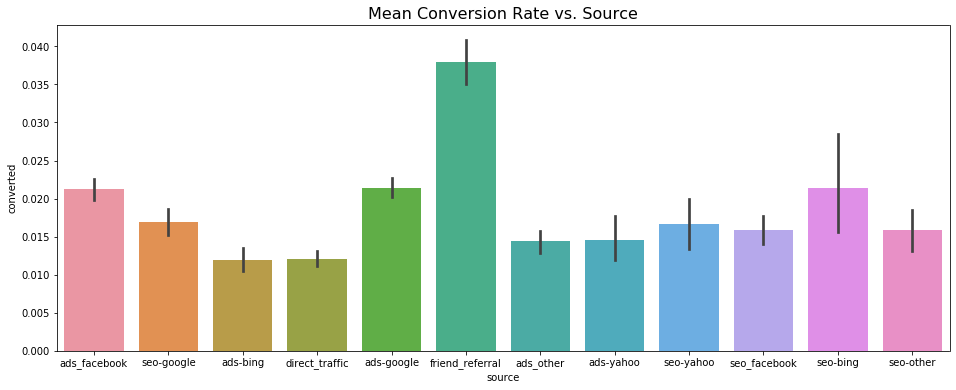

In [24]:
fig, ax = plt.subplots(figsize = (16, 6))
sns.barplot(x = 'source', y = 'converted', data = df, ax = ax)
ax.set_title('Mean Conversion Rate vs. Source', fontsize=16)
plt.show()

Conversion rate with source (A/B)

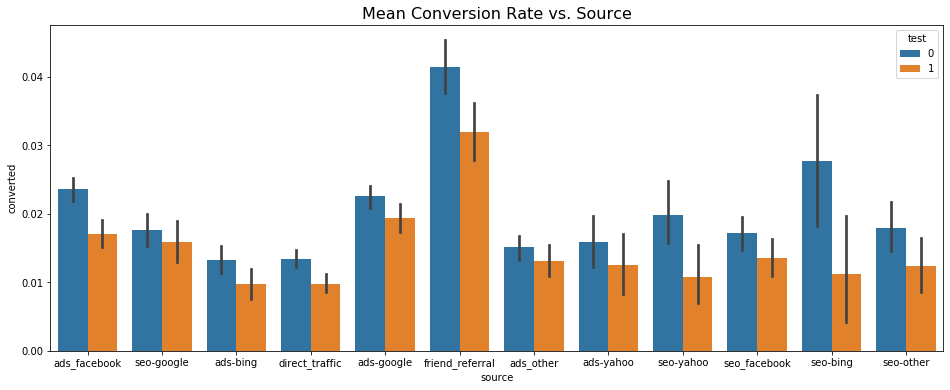

In [25]:
fig, ax = plt.subplots(figsize = (16, 6))
sns.barplot(x = 'source', y = 'converted', hue ='test', data = df, ax=ax)
ax.set_title('Mean Conversion Rate vs. Source', fontsize=16)
plt.show()

## 2. Visualization of Device

In [26]:
df.groupby('device')['converted'].mean().reset_index()

,device,converted
0,mobile,0.018422
1,web,0.017914


Conversion rate with device

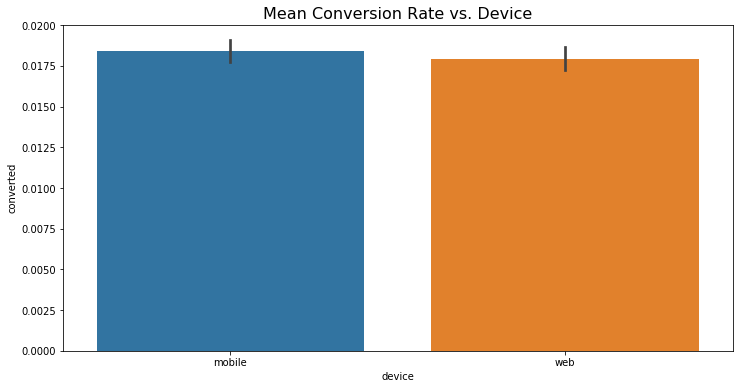

In [27]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(x = 'device', y = 'converted', data = df, ax = ax)
ax.set_title('Mean Conversion Rate vs. Device', fontsize = 16)
plt.show()

Conversion rate with device (A/B)

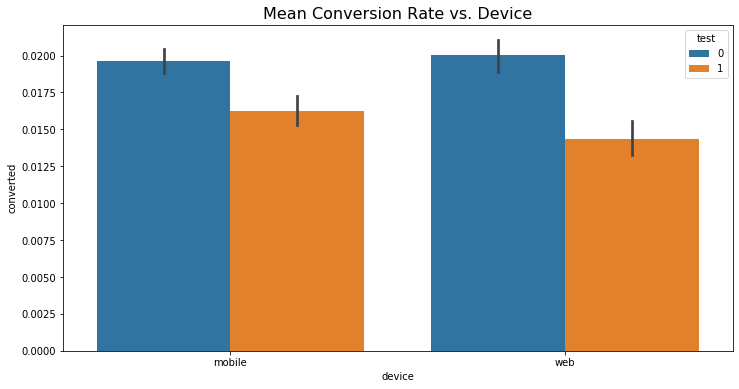

In [28]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(x = 'device', y = 'converted', hue = 'test', data = df, ax = ax)
ax.set_title('Mean Conversion Rate vs. Device', fontsize = 16)
plt.show()

## 3. Visualization of Operative System

In [29]:
df.groupby('operative_system')['converted'].mean().reset_index()

,operative_system,converted
0,android,0.014821
1,iOS,0.022272
2,linux,0.008540
3,mac,0.024306
4,other,0.012324
5,windows,0.016733


Conversion rate with Operative System

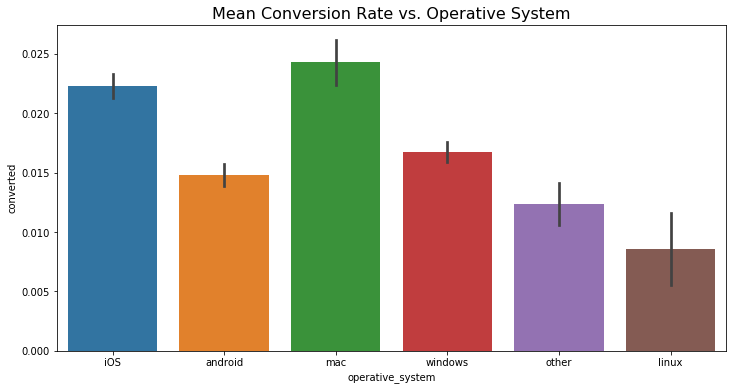

In [30]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(x = 'operative_system', y = 'converted', data = df, ax = ax)
ax.set_title('Mean Conversion Rate vs. Operative System', fontsize = 16)
plt.show()

Conversion rate with Operative System (A/B)

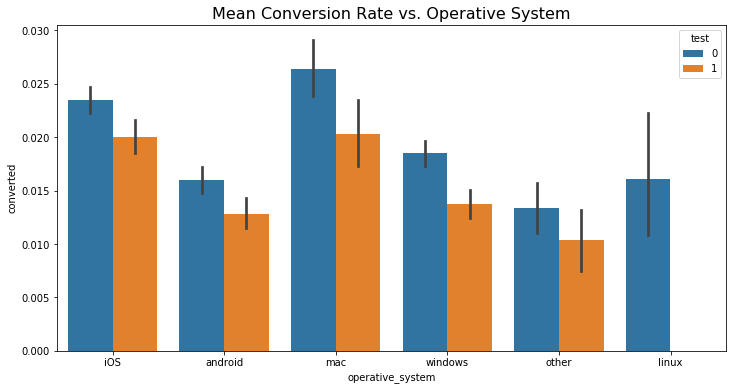

In [31]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(x = 'operative_system', y = 'converted', hue = 'test', data = df, ax = ax)
ax.set_title('Mean Conversion Rate vs. Operative System', fontsize = 16)
plt.show()

## Observation:
1. Source： Friend-referral users have much higher conversion rate
2. Device: The influence of device is not significant
3. Operative System: Mac and ios users have much higher conversion rate

friend_referral, Apple user (MAC or iOS), low price are three great positive factors which improve the conversion rate, if we want to increase the price, which impacts negatively on conversion rate.
There are two thing we can do

* lauch special marketing program targeted to MAC or iOS users
* rewards user which can invite his/her friend to use our software